In [1]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed

Populating the interactive namespace from numpy and matplotlib


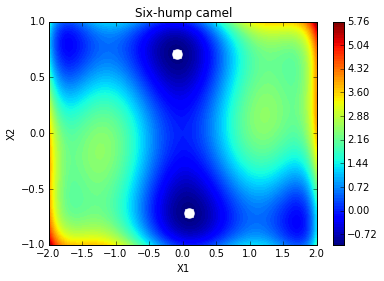

In [2]:
# create the object function
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel(sd = 0.1)
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
f_true.plot()

# GP

In [5]:
# Creates three identical objects that we will later use to compare the optimization strategies 
# myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
#                                               domain=bounds,
#                                               model_type = 'deepGP',
#                                               acquisition_type='EI',  
#                                               normalize_Y = True,
#                                               acquisition_weight = 0.1)  

myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 0.1)  

** GPyOpt Bayesian Optimization class initialized succesfuly **


In [6]:
# runs the optimization for the three methods
max_iter = 20  # maximum time 40 iterations

myBopt2D.run_optimization(max_iter)

   ** Maximum number of iterations reached **


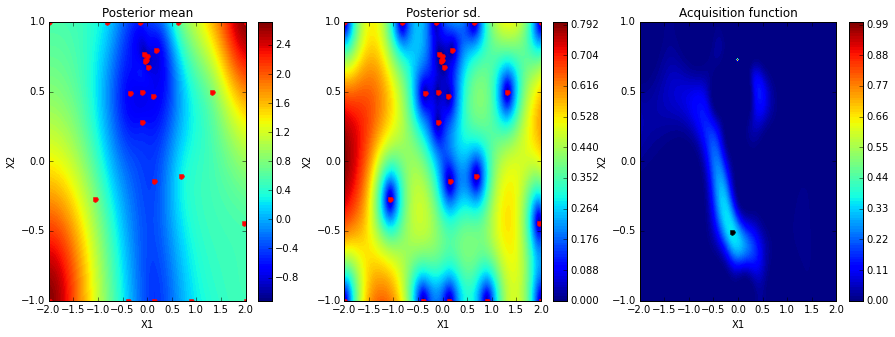

In [7]:
myBopt2D.plot_acquisition()

In [10]:
myBopt2D.model.model.predict(myBopt2D.X)

(array([[ 0.24425216],
        [-0.39179236],
        [ 0.77811775],
        [ 0.57477923],
        [-0.71630222],
        [-0.68187961],
        [-0.54853136],
        [ 0.8112665 ],
        [-0.73464808],
        [ 0.15726473],
        [-0.60159276],
        [-0.88664233],
        [-0.77238385],
        [-1.10862763],
        [-0.95368552],
        [-1.02666526],
        [-0.97360485],
        [-0.43886635],
        [ 0.56133479],
        [ 2.6814222 ],
        [ 0.17740848],
        [ 0.55629866],
        [ 0.10444187],
        [ 2.67391134],
        [ 0.5147244 ]]), array([[  2.79257492e-08],
        [  2.79268202e-08],
        [  2.79261527e-08],
        [  2.79249983e-08],
        [  2.79360119e-08],
        [  2.79334338e-08],
        [  2.79323890e-08],
        [  2.79255183e-08],
        [  2.79338359e-08],
        [  2.79291052e-08],
        [  2.79300933e-08],
        [  2.79319947e-08],
        [  2.79314405e-08],
        [  2.79247161e-08],
        [  2.79313974e-08],
    

In [9]:
myBopt2D.Y

array([[ 1.22321676],
       [ 0.05585758],
       [ 2.20304248],
       [ 1.82984685],
       [-0.53972906],
       [-0.47655174],
       [-0.23181202],
       [ 2.26388183],
       [-0.57340072],
       [ 1.06356508],
       [-0.32919757],
       [-0.85235634],
       [-0.64265849],
       [-1.25985188],
       [-0.97541113],
       [-1.10931976],
       [-1.01192744],
       [-0.03053929],
       [ 1.80517171],
       [ 5.69625682],
       [ 1.10053572],
       [ 1.79592879],
       [ 0.96661705],
       [ 5.68247183],
       [ 1.71962574]])

In [12]:
print myBopt2D.model.model


Name                              : GP regression
Log-likelihood                    : -123.739284765
Number of Parameters              : 3
Number of Optimization Parameters : 3
Updates                           : True
Parameters:
  GP_regression.           |       Value        |  Constraint  |  Prior  |  Tied to
  Mat32.variance           |     1.25841335808  |     +ve      |         |         
  Mat32.lengthscale        |     1.01998197012  |     +ve      |         |         
  Gaussian_noise.variance  |  8.9624494302e-09  |     +ve      |         |         


# DeepGP

In [22]:
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel(sd = 0.1)
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
# f_true.plot()
# Creates three identical objects that we will later use to compare the optimization strategies 

#### The arguments below are not passed to deepGP because the parent class does not propagate them.
### check the modular demo.
myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              model_type = 'deepGP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 0.1,
                                              back_constraint=False,
                                              verbose=True,
                                              max_iters=50,
                                              repeatX=False)  

** GPyOpt Bayesian Optimization class initialized succesfuly **


In [23]:
print myBopt2D.model.model


Name                              : deepgp
Log-likelihood                    : -7.09469808871
Number of Parameters              : 5428
Number of Optimization Parameters : 5428
Updates                           : True
Parameters:
  deepgp.                           |        Value        |    Constraint     |  Prior  |  Tied to
  enclayer_1.mlp.layer_1.W          |           (100, 2)  |                   |         |         
  enclayer_1.mlp.layer_1.b          |             (100,)  |                   |         |         
  enclayer_1.mlp.layer_2.W          |          (50, 100)  |                   |         |         
  enclayer_1.mlp.layer_2.b          |              (50,)  |                   |         |         
  enclayer_1.mlp.layer_3.W          |            (1, 50)  |                   |         |         
  enclayer_1.mlp.layer_3.b          |    -0.338919153375  |                   |         |         
  enclayer_1.Y_var                  |      13.0421372104  |        +ve       

In [ ]:
# runs the optimization for the three methods
max_iter = 5  # maximum time 40 iterations

myBopt2D.run_optimization(max_iter)

In [ ]:
myBopt2D.plot_acquisition()